Lecture: AI I - Basics 

Previous:
[**Chapter 3.2: Pandas**](../03_data/03_matplotlib.ipynb)

---

# Chapter 3.3: Visualisation with Matplotlib

- [Matplotlib](#matplotlib)
- [Gallery](#gallery)
- [Plot Structure](#plot-structure)
- [Axes Methods vs. Pyplot Methods](#axes-methods-vs-pyplot-methods)
- [Essential Plot Types](#essential-plot-types)
- [Styling](#styling)
- [More Annotations](#more-annotations)

## Matplotlib

[Matplotlib](https://matplotlib.org/stable/users/index.html) is the most widely used Python library for creating static, animated, and interactive visualizations. It provides a flexible plotting system inspired by MATLAB, allowing you to generate simple line charts as well as highly customized scientific figures. Many higher-level libraries, such as seaborn and pandas plotting, are built on top of Matplotlib, making it the cornerstone of the Python visualization ecosystem.

## Gallery

following the link below to explore a wide range of examples showcasing the capabilities of Matplotlib:

In [1]:
from IPython.display import IFrame

IFrame(
    "https://matplotlib.org/stable/gallery/index",
    width="100%",
    height=750,
)

## Jupyter Backend

In Jupyter Notebooks, the special command `%matplotlib inline` is a magic function that changes how Matplotlib displays plots. Instead of opening plots in a separate interactive window, this directive makes sure that all plots are rendered directly inside the notebook cells.

In [2]:
%matplotlib inline

## Import Convention

When working with Matplotlib, the widely accepted convention is to import the `pyplot` [module](https://matplotlib.org/stable/api/pyplot_summary.html) under the alias `plt`:

```python
import matplotlib.pyplot as plt
```

In [3]:
import matplotlib.pyplot as plt

## Plot Structure

A typical Matplotlib plot consists of the following components:
* **Figure**: The entire window or page that will contain the plot(s).
* **Subplots and Axes**: Subplots are individual plots within the figure, arranged in a grid. Each subplot contains its own set of axes.
* **Axis**: The area where data is plotted, including the x and y axes.
* **Artists**: The visual elements of the plot, such as lines, markers, and text.
* **Legend and Annotations**: The legend explains the symbols or colors used in the plot, while annotations provide additional context or information about specific points.

### Figure

The [Figure](https://matplotlib.org/stable/api/figure_api.html) is the overall container that holds everything in a plot. Think of it as the “canvas” on which all subplots, axes, and labels are drawn. A single script can create multiple figures, each independent of the others.
`figsize` sets the width and height in inches.

In [4]:
fig = plt.figure(figsize=(5, 5))

<Figure size 500x500 with 0 Axes>

To show the plot we need to call the `.show()` method on the figure object or `plt.show()`.

In [5]:
fig = plt.figure(figsize=(5, 5))
fig.show()

/tmp/ipykernel_6125/3032297195.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Figure size 500x500 with 0 Axes>

To show an empty figure, we need to add a subplot to it.

/tmp/ipykernel_6125/4084723797.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


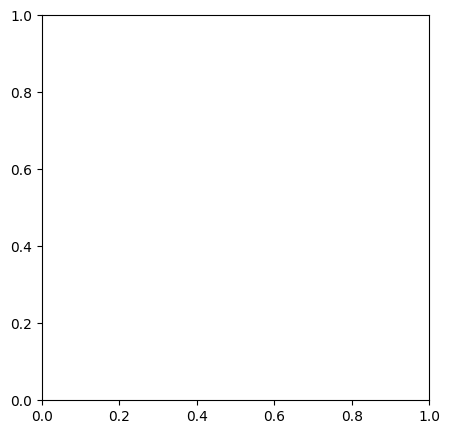

In [6]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
fig.show()

### Subplots and Axes

Inside a figure, you can create subplots, which are grids of smaller plots. Each subplot is represented by an Axes object.
- Axes (plural: Axes) are the actual plots where your data lives.
- Each [Axes](https://matplotlib.org/stable/api/axes_api.html) has its own x-axis, y-axis, and labels.
- The `plt.subplots()` function is the most common way to create them.

> **Note**: We'll take another look at this later.

> **Hint**: We can also use the `plt.subplot()` function to create subplots directly, instead of:
> ```python
> fig = plt.figure()
> ax = fig.add_subplot(111)
> ```

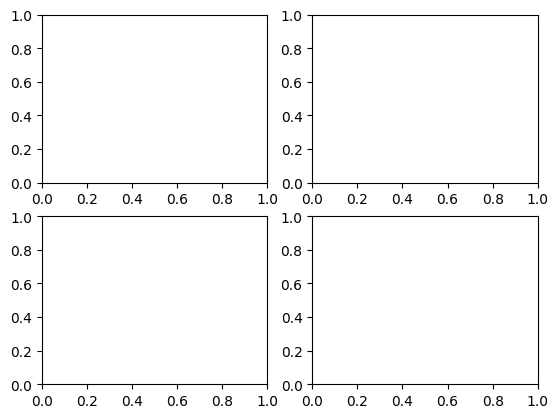

In [7]:
fig, ax = plt.subplots(2, 2)

#### Multiple Subplots

The most common way is using `plt.subplots()`, which creates both the figure and a grid of Axes. `axes` is returned as a NumPy array of Axes objects. You can index into it (e.g. `axes[0, 1]`) to work with a specific subplot. For 1D grids, it’s returned as a flat array for convenience. Use `fig.tight_layout()` to automatically adjust spacing between subplots.

/tmp/ipykernel_6125/635728649.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


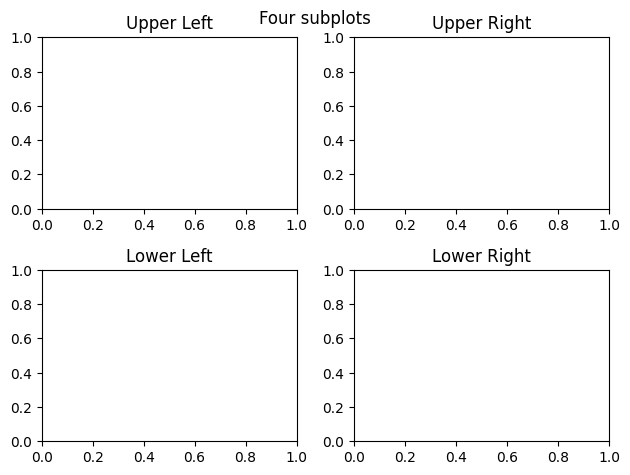

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=2)
axes[0, 0].set(title="Upper Left")
axes[0, 1].set(title="Upper Right")
axes[1, 0].set(title="Lower Left")
axes[1, 1].set(title="Lower Right")

# tight_layout makes sure titles and tick labels do not overlap.
fig.tight_layout()
fig.suptitle("Four subplots")

fig.show()

# Axis

Each [Axes](https://matplotlib.org/stable/api/axis_api.html) object contains an x-axis and a y-axis, which handle:
- Ticks (the small marks along the axis).
- Tick labels (numbers or text along the axis).
- Gridlines (optional).

/tmp/ipykernel_6125/4258761890.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


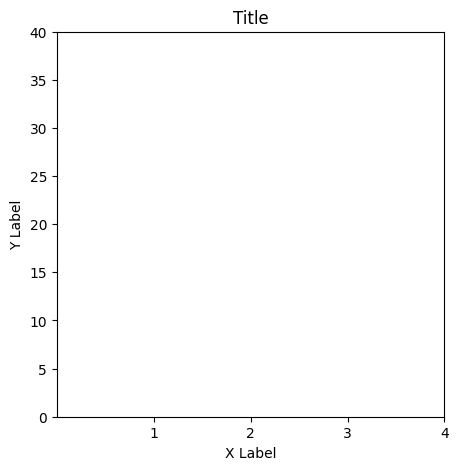

In [9]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_xlabel("X Label")
ax.set_ylabel("Y Label")
ax.set_title("Title")
ax.set_xticks([1, 2, 3, 4])
ax.set_ylim(0, 40)
fig.show()

In Matplotlib, each Axes object has a convenient method called `set()`, which allows you to configure multiple properties of the Axes in one call. Instead of calling individual methods like `set_xlabel()`, `set_ylabel()`, `set_title()`, or `set_xticks()`, you can use ax.set() and pass keyword arguments to adjust several aspects at once.

/tmp/ipykernel_6125/2292175349.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


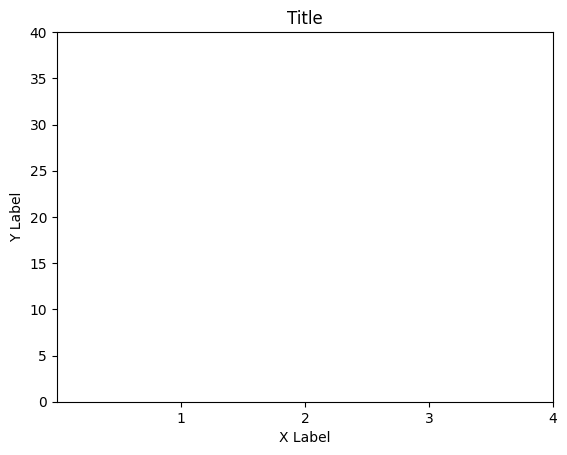

In [10]:
fig, ax = plt.subplots()
ax.set( 
    xlabel="X Label",
    ylabel="Y Label",
    title="Title",
    xticks=[1, 2, 3, 4],
    ylim=(0, 40)
)
fig.show()


### Artists (The Drawn Elements)

Everything visible in a plot — lines, text, legends, labels — is called an Artist in Matplotlib. Examples include:
- [Line2D](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html) → from `ax.plot()`
- Patch → for shapes like rectangles or circles
- Text → titles, axis labels, annotations

> **Note**: Have a look at the gallery for examples.

/tmp/ipykernel_6125/2488875861.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


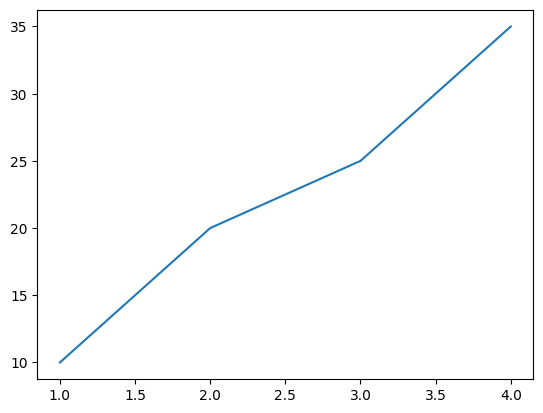

In [11]:
fig, ax = plt.subplots()
ax.plot(
    [1, 2, 3, 4], 
    [10, 20, 25, 35]
)
fig.show()

### Legend and Annotations

- The Legend provides labels for plotted elements (`ax.legend()`).
- Annotations add text notes or arrows to highlight important parts of the data (`ax.annotate()`).

/tmp/ipykernel_6125/456241508.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


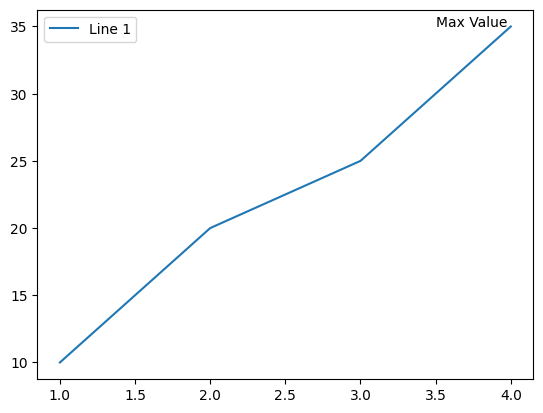

In [12]:
fig, ax = plt.subplots()
ax.plot(
    [1, 2, 3, 4], 
    [10, 20, 25, 35],
    label="Line 1"
)
ax.annotate("Max Value", xy=(4, 35), xytext=(3.5, 35))
ax.legend()
fig.show()

## Axes Methods (OOP) vs. Pyplot Methods (State Machine)

Matplotlib offers two main ways of creating plots: the pyplot interface and the object-oriented interface. The pyplot interface works like a state machine. Functions such as `plt.plot()`, `plt.xlabel()` or `plt.title()` act on the current active figure and axes, which are managed internally by Matplotlib. This makes the interface quick and convenient for simple or interactive plots, but because it relies on implicit state, it can become confusing when working with multiple figures or subplots at the same time.

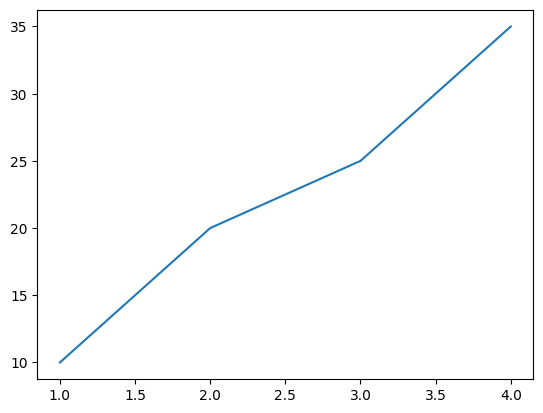

In [13]:
plt.figure()
plt.plot(
    [1, 2, 3, 4], 
    [10, 20, 25, 35]
)
plt.show()

The object-oriented approach, in contrast, uses explicit Axes objects. Here you create figures and axes directly, usually with `plt.subplots()`, and then call methods like `ax.plot()`, `ax.set_xlabel()`, or `ax.set_title()` on the specific Axes. This style requires a little more setup, but it gives you precise control over which subplot you are modifying and scales much better to complex layouts or structured projects.

In line with the [Zen of Python (PEP 20)](https://peps.python.org/pep-0020/), where _"explicit is better than implicit"_, the object-oriented style is generally recommended. While pyplot methods are fine for quick exploration or demonstrations, working with Axes methods is clearer, more predictable, and better aligned with Python’s design philosophy.

## Essential Plot Types

The most common plot types in Matplotlib include:

- Line plots
- Bar plots
- Pie charts
- Histograms
- Box plots & Violin plots
- Scatter plots
- Heatmaps
- Images

For more examples have a look at the [Matplotlib Examples](https://matplotlib.org/stable/gallery/index.html).

### Line Plots

In Matplotlib, a line chart is typically created with the plot() method of an Axes object. By default, it draws straight lines between given x- and y-values, but the appearance can be customized with styles, markers, and colors. Multiple lines can be drawn in the same chart to compare datasets directly.

/tmp/ipykernel_6125/2120318180.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


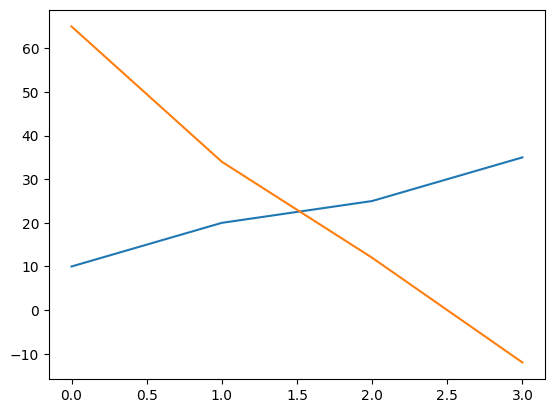

In [14]:
fig, ax = plt.subplots()
ax.plot([10, 20, 25, 35])
ax.plot([65, 34, 12, -12])
fig.show()

Filled regions are a powerful way to highlight areas under or between curves in a plot. Instead of only showing lines, filled plots emphasize ranges of values, making it easier to visualize cumulative quantities, confidence intervals, or comparisons between datasets.In Matplotlib, the most common function for this is `fill_between()`, which fills the space between two curves or between a curve and a baseline. By default, the region is shaded with a solid color, but transparency (alpha), hatching, and color gradients can be applied for better visual clarity.

/tmp/ipykernel_6125/2596333240.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


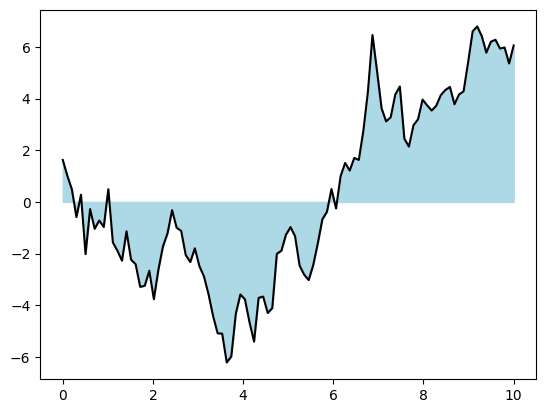

In [15]:
import numpy as np

np.random.seed(1)

y = np.random.randn(100).cumsum()
x = np.linspace(0, 10, 100)

fig, ax = plt.subplots()

ax.plot(x, y, color='black')
ax.fill_between(x, y, color='lightblue')

fig.show()

/tmp/ipykernel_6125/736370051.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


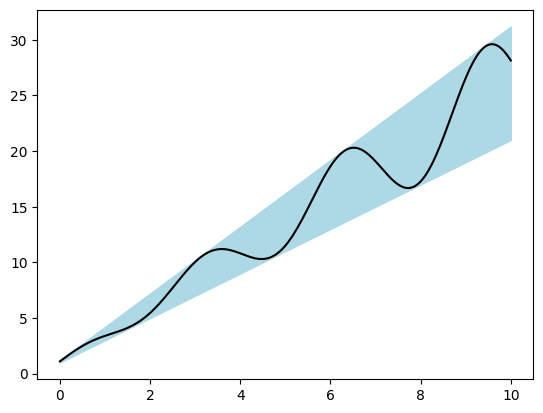

In [16]:
x = np.linspace(0, 10, 200)
y1 = 2 * x + 1
y2 = 3 * x + 1.2
y_mean = 0.5 * x * np.cos(2*x) + 2.5 * x + 1.1

fig, ax = plt.subplots()

ax.fill_between(x, y1, y2, color='lightblue')
ax.plot(x, y_mean, color='black')

fig.show()

### Bar Plot

Bar charts are a fundamental visualization type used to represent categorical data with rectangular bars. The length or height of each bar corresponds to the value of the category it represents, making it easy to compare quantities across discrete groups.

In Matplotlib, bar charts can be created using the `bar()` or `barh()` methods of an Axes object. Vertical bars are useful for comparing categories side by side, while horizontal bars are often clearer for labels with long names. Bars can also be grouped or stacked to show multiple variables at once.

In [17]:
np.random.seed(2)

y = np.random.random(5) * 2
categories = ["A", "B", "C", "D", "E"]

y

array([0.8719898 , 0.05185246, 1.09932496, 0.87064479, 0.8407356 ])

/tmp/ipykernel_6125/737461207.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


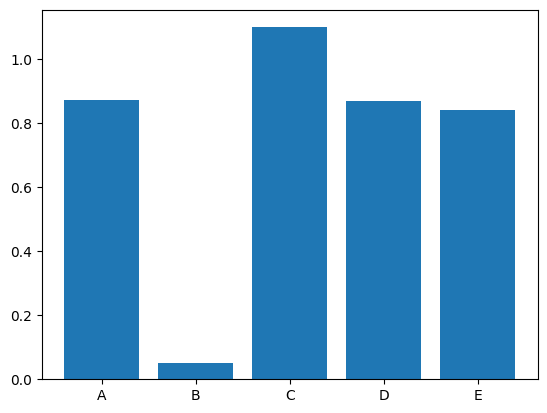

In [18]:
fig, ax = plt.subplots()
ax.bar(categories, y)
fig.show()

Error bars can be added to bar charts to indicate variability or uncertainty in the data, making it clear whether differences between categories are statistically meaningful or within expected variation.

/tmp/ipykernel_6125/2455521440.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


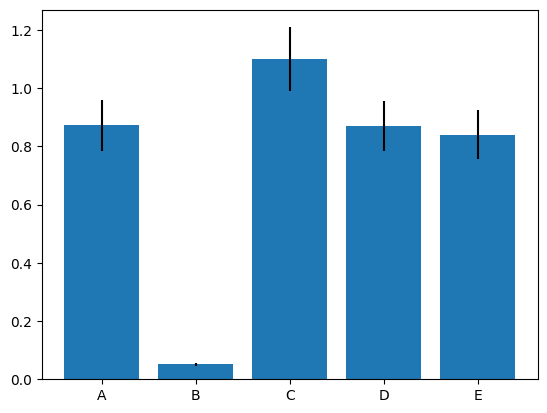

In [19]:
error = y * 0.1

fig, ax = plt.subplots()
ax.bar(categories, y, yerr=error)
fig.show()

We can add a horizontal line to the x-axis to indicate negative values.

/tmp/ipykernel_6125/2616062305.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


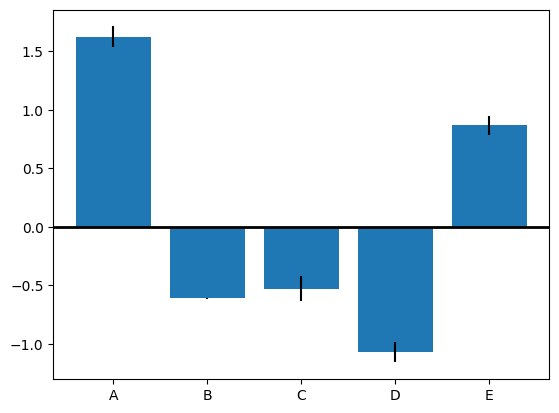

In [20]:
np.random.seed(1)
y = np.random.randn(5)

fig, ax = plt.subplots()

ax.bar(categories, y, yerr=error)
ax.axhline(y=0, color='black', linewidth=2)

fig.show()

In Matplotlib, everything you see in a figure — lines, bars, texts, legends, axes — is represented by an Artist. When you call a plotting method like `plot()` or `bar()`, it returns one or more Artist objects that correspond to the visual elements created. Most of the time you don’t need to keep these objects, since Matplotlib handles them automatically. However, if you want to go beyond the usual keyword arguments, you can capture them and use their methods to apply fine-grained customizations.

For example, the `bar()` method does not return individual bars directly, but a container Artist that holds all bar elements. To adjust each bar individually, you can iterate over the contained Rectangle objects. This allows you to, for instance, set specific colors or styles for different categories.

/tmp/ipykernel_6125/575941240.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


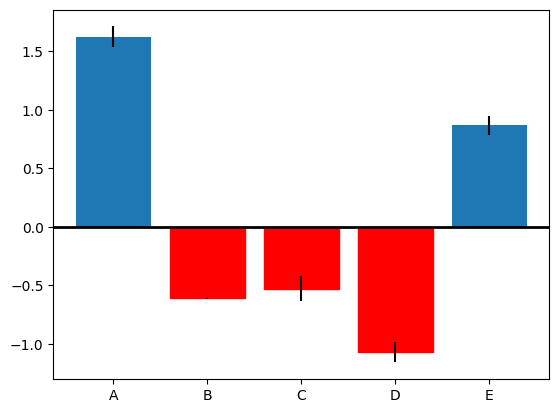

In [21]:
np.random.seed(1)
y = np.random.randn(5)

fig, ax = plt.subplots()
bars = ax.bar(categories, y, yerr=error)

for bar, height in zip(bars, y):
    if height < 0:
        bar.set(color='red')

ax.axhline(y=0, color='black', linewidth=2)
fig.show()

In [22]:
print(*bars, sep="\n")

Rectangle(xy=(-0.4, 0), width=0.8, height=1.62435, angle=0)
Rectangle(xy=(0.6, 0), width=0.8, height=-0.611756, angle=0)
Rectangle(xy=(1.6, 0), width=0.8, height=-0.528172, angle=0)
Rectangle(xy=(2.6, 0), width=0.8, height=-1.07297, angle=0)
Rectangle(xy=(3.6, 0), width=0.8, height=0.865408, angle=0)


The same can be achieved by creating a color array before plotting:

/tmp/ipykernel_6125/1867004684.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


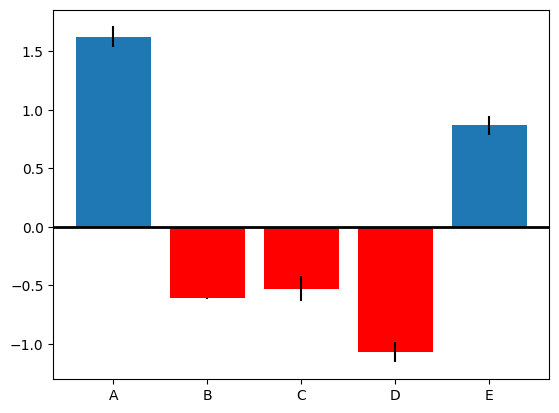

In [23]:
np.random.seed(1)
y = np.random.randn(5)

fig, ax = plt.subplots()

color = np.where(y < 0, 'red', 'C0')

bars = ax.bar(categories, y, yerr=error, color=color)
ax.axhline(y=0, color='black', linewidth=2)

fig.show()

### Pie Chart

In Matplotlib, pie charts are created with the pie() method. You can customize slices with labels, colors, and explode effects to emphasize specific parts.

/tmp/ipykernel_6125/2100271119.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


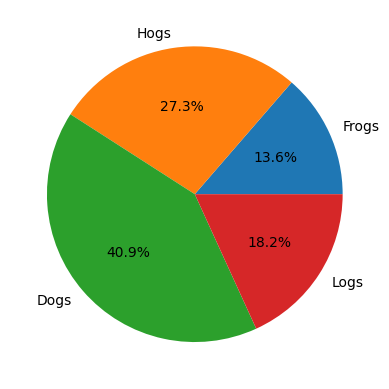

In [24]:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 20]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')

fig.show()

### Histogram

Histograms are a type of plot used to visualize the distribution of numerical data. They group data values into intervals, called bins, and display how many observations fall into each bin. This makes histograms especially useful for identifying patterns such as skewness, modality (single or multiple peaks), or outliers in datasets.

In Matplotlib, histograms can be created with the `hist()` method. By default, it automatically determines bins, but you can control their number and width for finer or coarser resolution.

In [25]:
my = 0
sigma = 1
num_samples = 1000
dist = np.random.normal(my, sigma, num_samples)

/tmp/ipykernel_6125/461850166.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


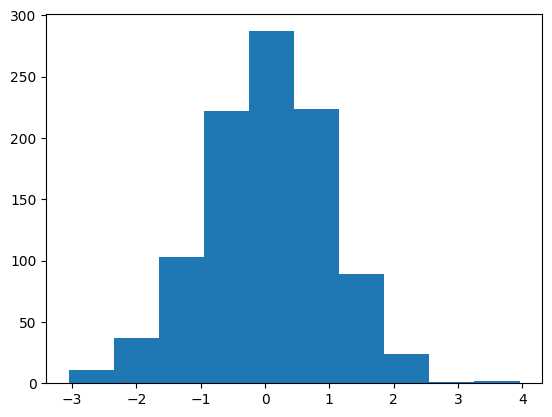

In [26]:
fig, ax = plt.subplots()
ax.hist(dist)
fig.show()

The amount of bins can be adjusted using the `bins` parameter in the `hist()` method. For example:


/tmp/ipykernel_6125/2596057616.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


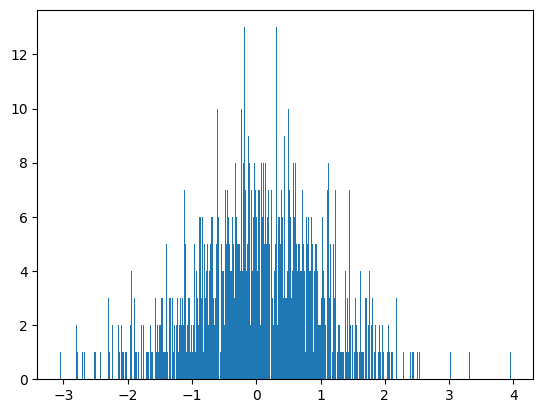

In [27]:
fig, ax = plt.subplots()
ax.hist(dist, bins=500)
fig.show()

Or it is possible to automatically determine the number of bins using the `bins='auto'` option:

/tmp/ipykernel_6125/729297696.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


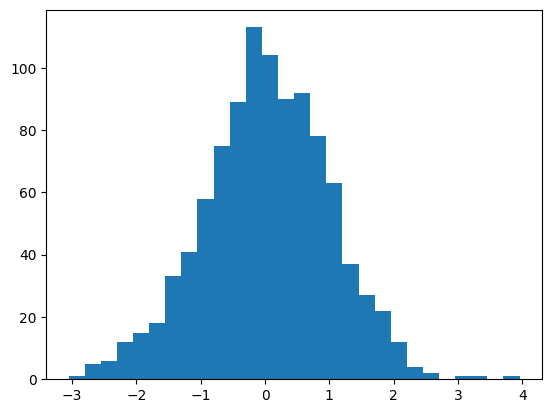

In [28]:
fig, ax = plt.subplots()
ax.hist(dist, bins="auto")
fig.show()

### Box Plot

Boxplots (also called whisker plots) are a powerful way to visualize the spread and summary statistics of numerical data. They show the median, lower and upper quartiles (the “box”), and potential outliers (points outside the whiskers). This makes them especially useful for comparing distributions across multiple groups side by side.

In Matplotlib, you can create boxplots using the `boxplot()` method. The resulting plot makes it easy to see central tendency, variability, and asymmetry in the data, as well as detect outliers.

The Box and Quantiles
- The box represents the interquartile range (IQR), which spans from the first quartile (Q1, 25th percentile) to the third quartile (Q3, 75th percentile).
- Inside the box, a horizontal line marks the median (Q2, 50th percentile), showing the central tendency of the data.

The Whiskers
- The whiskers extend from the edges of the box toward the smallest and largest data points within 1.5 × IQR from the quartiles.
- ower whisker: from Q1 down to the smallest value ≥ Q1 – 1.5 × IQR.
- Upper whisker: from Q3 up to the largest value ≤ Q3 + 1.5 × IQR.

Outliers
- Any points lying outside the whiskers are considered outliers and plotted individually, often as dots or small circles.

/tmp/ipykernel_6125/693839143.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


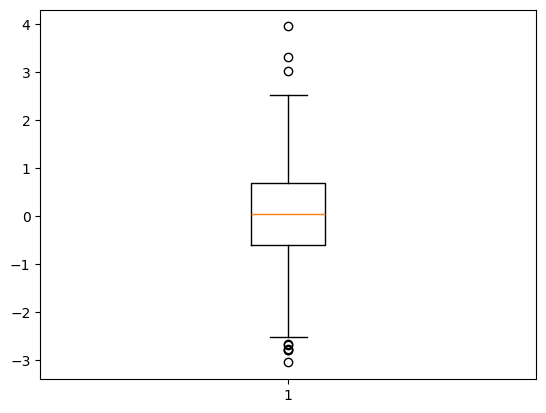

In [29]:
fig, ax = plt.subplots()
ax.boxplot(dist)
fig.show()

In [30]:
means = [0, -1, 2.5, 4.3, -3.6]
sigmas = [1.2, 5, 3, 1.5, 2]
nums = [150, 1000, 100, 200, 500]

dists = [np.random.normal(*args) for args in zip(means, sigmas, nums)]

It is also possible to output multiple boxplots or violin plots in the same figure for comparison. This can be done by calling the `boxplot()` or `violinplot()` method multiple times on the same axes object.


/tmp/ipykernel_6125/2034798991.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


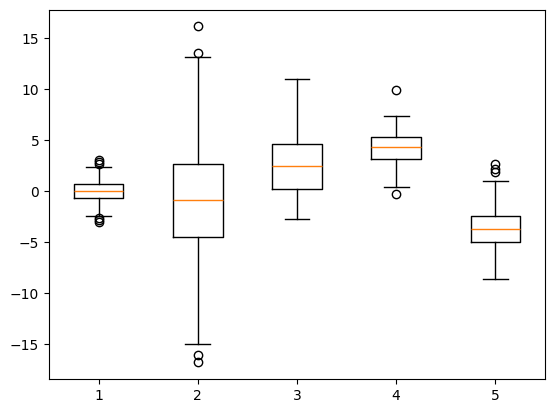

In [31]:
fig, ax = plt.subplots()
ax.boxplot(dists)
fig.show()

### Violin Plot

Violin plots are similar to boxplots but add kernel density estimation on each side of the box, producing a shape that looks like a violin. This makes them useful not only for showing quartiles and medians but also for visualizing the full distribution of the data.

In Matplotlib, violin plots are created with the `violinplot()` method. Unlike boxplots, they reveal whether data is multimodal (has multiple peaks) or skewed in ways a boxplot alone might not show.

/tmp/ipykernel_6125/1532463204.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


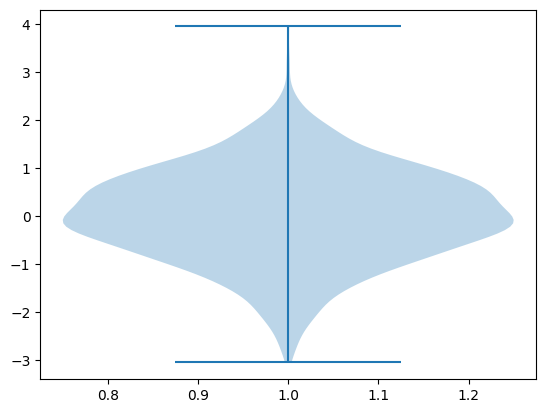

In [32]:
fig, ax = plt.subplots()
ax.violinplot(dist)
fig.show()

As mentioned before we can also display multiple violin plots in the same figure for comparison. This can be done by calling the `violinplot()` method multiple times on the same axes object.

/tmp/ipykernel_6125/3974489226.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


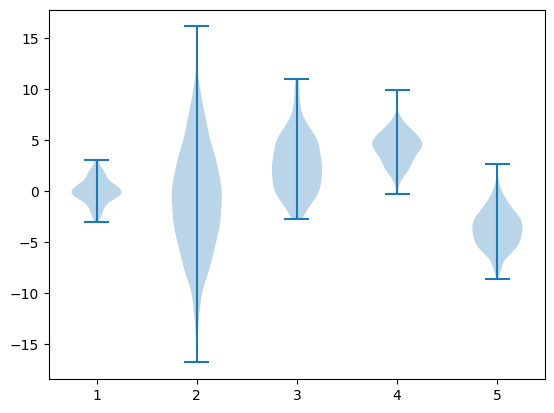

In [33]:
fig, ax = plt.subplots()
ax.violinplot(dists)
fig.show()

### Scatter Plot

Scatterplots are a fundamental tool for visualizing the relationship between two numerical variables. Each data point is represented as a marker positioned according to its x- and y-values, which makes it easy to detect correlations, clusters, and outliers. Unlike line or bar charts, scatterplots do not imply continuity or grouping; instead, they highlight the distribution and spread of individual observations.

In Matplotlib, scatterplots are created with the `scatter()` method of an Axes object. The method allows customization of marker shape, size, and color, which can be mapped to additional variables to add a third dimension of information.

/tmp/ipykernel_6125/3481774835.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


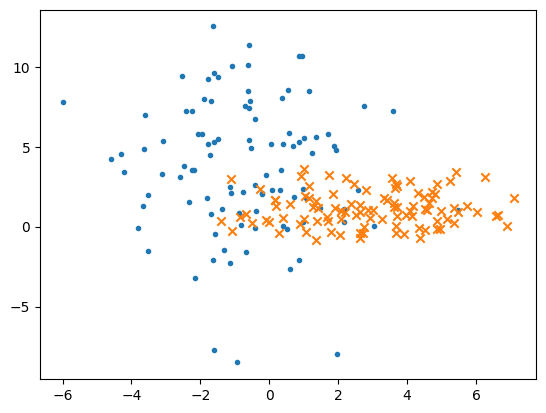

In [34]:
num = 100
x1 = np.random.normal(-1, 2, num)
y1 = np.random.normal(3, 4, num)
x2 = np.random.normal(3, 2, num)
y2 = np.random.normal(1, 1, num)

fig, ax = plt.subplots()
ax.scatter(x1, y1, marker='.')
ax.scatter(x2, y2, marker='x')
fig.show()

This following example demonstrates how scatterplots can incorporate marker size (s) and color mapping (c) to encode more variables in a two-dimensional space:

/tmp/ipykernel_6125/2602561502.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


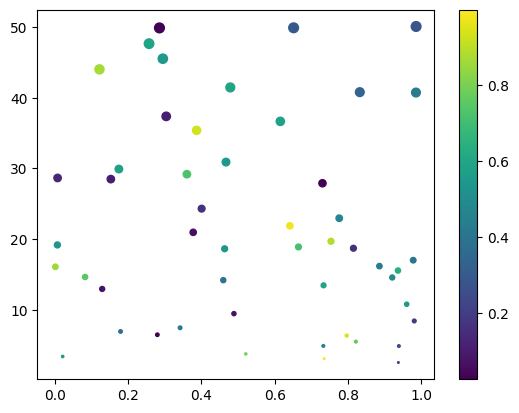

In [35]:
n = 50
x1 = np.random.random(n)
x2 = np.random.random(n) * 50
x3 = np.random.random(n)
y = x1 + x2 + x3

fig, ax = plt.subplots()
sc = ax.scatter(x=x1, y=y, s=x2, c=x3, marker='o')
fig.colorbar(sc)
fig.show()

### Heatmap

Heatmaps are a powerful visualization tool for representing two-dimensional data where values are encoded as colors. Instead of plotting individual points or bars, a heatmap fills a grid with color intensities, making it easy to identify patterns, correlations, and clusters at a glance. They are commonly used in statistics, machine learning, and exploratory data analysis, for example when visualizing correlation matrices or confusion matrices.

In Matplotlib, heatmaps can be created with the `imshow()`, `pcolor()` or `pcolormesh()` methods, which provides a higher-level and more convenient interface.



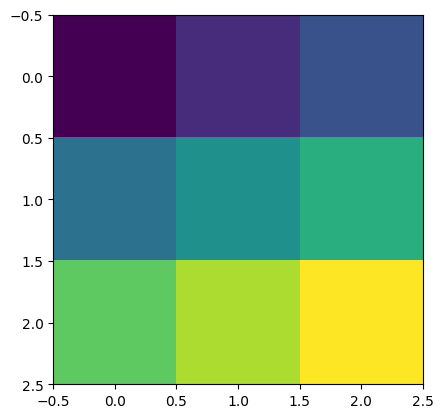

In [36]:
arr_2d = np.arange(9).reshape((3, 3))
arr_2d

fig, ax = plt.subplots()
ax.imshow(arr_2d)
plt.show()

An alternative approach to creating heatmaps is to use the `matshow()` function, which is specifically designed for displaying matrices. It automatically adjusts the aspect ratio and provides a more intuitive way to visualize 2D data.


/tmp/ipykernel_6125/961459446.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


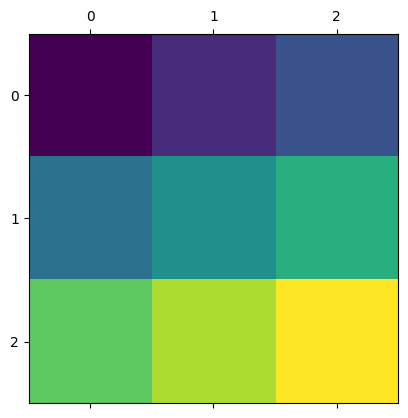

In [37]:
fig, ax = plt.subplots()
ax.matshow(arr_2d)
fig.show()

With `colorbar()`, you can add a color scale to your heatmap, which helps in understanding the mapping between data values and colors. Here's how you can do it:

/tmp/ipykernel_6125/1351272922.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


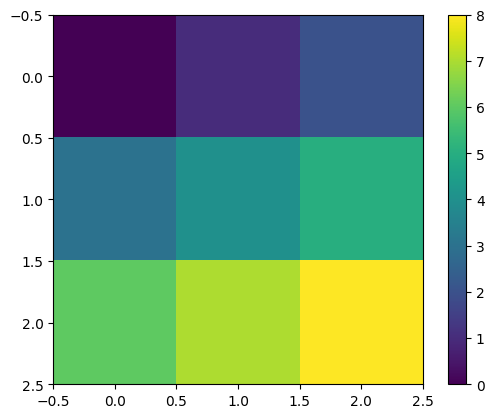

In [38]:
fig, ax = plt.subplots()
im = ax.imshow(arr_2d)
fig.colorbar(im)
fig.show()

#### Shared Color Parameters

Many Matplotlib plotting functions such as `imshow()`, `pcolormesh()`, `contour()`, and `scatter()` share a common set of parameters that control how data values are mapped to colors. These parameters make it possible to keep visualizations consistent and comparable across different plot types.
- `cmap` – defines the colormap (e.g., `viridis`, `plasma`, `coolwarm`) used to map values to colors.
- `vmin` – sets the minimum data value that will be mapped to the lower end of the colormap.
- `vmax` – sets the maximum data value that will be mapped to the upper end of the colormap.
- `norm` – allows for advanced scaling of values before colormap mapping, such as linear (`Normalize`), logarithmic (`LogNorm`), or discrete bins (`BoundaryNorm`).

/tmp/ipykernel_6125/3697843058.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


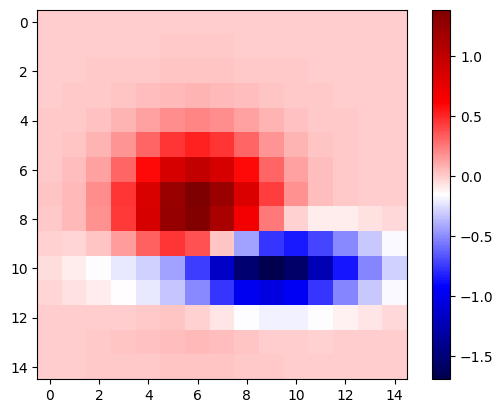

In [39]:
from matplotlib.cbook import get_sample_data
data = get_sample_data('axes_grid/bivariate_normal.npy')

fig, ax = plt.subplots()
im = ax.imshow(data, cmap='seismic')
fig.colorbar(im)
fig.show()

/tmp/ipykernel_6125/1634463005.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


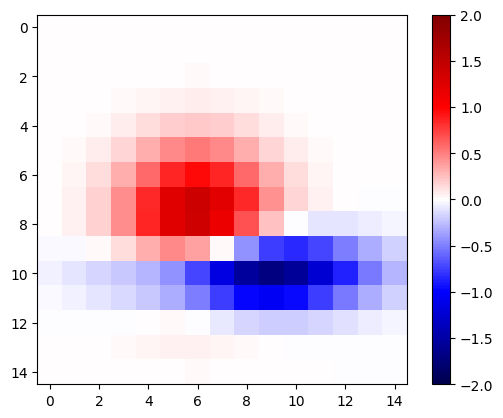

In [40]:
fig, ax = plt.subplots()
im = ax.imshow(data, cmap='seismic', vmin=-2, vmax=2)
fig.colorbar(im)
fig.show()

### Images

The Matplotlib function `imshow()` is not only useful for heatmaps but also for displaying actual images. It takes a 2D array (for grayscale images) or a 3D array (for color images, typically in RGB format) and renders it as an image inside a plot. This makes `imshow()` a convenient bridge between data visualization and image processing.

/tmp/ipykernel_6125/6373749.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


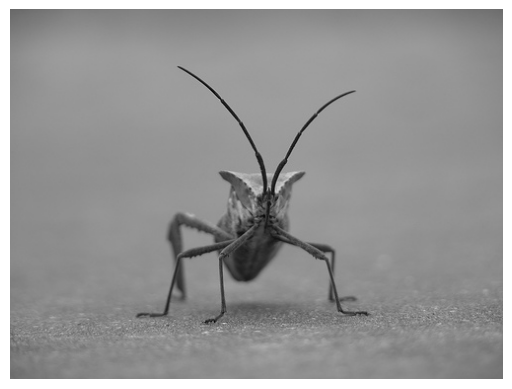

In [41]:
img = plt.imread("data/matplotlib/stinkbug.png")

fig, ax = plt.subplots()
ax.imshow(img)
ax.axis("off")
fig.show()

---

Lecture: AI I - Basics 

Exercise: [**Exercise 3.3: Visualisation with Matplotlib**](../03_data/exercises/03_matplotlib.ipynb)

Next: [**Chapter 3.4: Visualisation with Seaborn**]()